# Analysis of top-1000 movies from 2006 to 2016 according to IMDB.

### Content:
   + Introduction 
   + Data description
   + Researh questions
   + Data preparation: cleaning and shaping
   + Data visualisation and analysis
   + Conclusion
    

### Introduction
IMDB (also known as the Internet Movie Database) is the world's most popular and authoritative source of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, ratings, and fan and critical reviews. The movie and talent pages of IMDb are accessible to all internet users, but a registration process is necessary to contribute information to the site.
As one adjunct to data, the IMDb offers a rating scale that allows users to rate films on a scale of one to ten.
IMDb launched online in 1990 and has been a subsidiary of Amazon.com since 1998.
As of January 2020, IMDb has approximately 6.5 million titles (including episodes) and 10.4 million personalities in its database,as well as 83 million registered users.

The following analysis will provide an overview of the top-1000 movies from 2006 to 2016. It will also provide further insight on the relationships between ranking, revenue, actors, directors, genres and years. 


Source: https://en.wikipedia.org/wiki/IMDb and https://help.imdb.com/article/imdb/general-information/what-is-imdb/G836CY29Z4SGNMK5?ref_=help

### Data description
There is data set of 1,000 most popular movies on IMDB for 10 years. 
The data points included are: Rank, Title, Genre, Description, Director, Actors, Year, Runtime, Rating, Votes, Revenue and Metascore.

+ Rank - movie rank order
+ Title - name of the film
+ Genre - genre of the film
+ Description - text about the film
+ Director - name of person, who made the film
+ Actors - names of people, that played in the film
+ Year - realise year of the film
+ Runtime - the duration of the film in minutes.
+ Rating - the average rating of the film
+ Votes - number of accounts, that have voted for film
+ Revenue - number of profit money of the film
+ Metascore - an aggregated average of critic scores.

It is interesting to know more about relationships of these data points.
These analysis will be based on data of decade(2006-2016).

Source: https://www.kaggle.com/PromptCloudHQ/imdb-data

### Research questions
1. Analyse the relationships between revenue and rating of film. 
2. Find which year had the most highly-rated films. 
3. Identify which director makes films with the biggest revenue. 
4. Track relationship between genres and rating of film. Which genre are most often ranked low and which are the highest? 
5. Which actors are often found in high-rated films? 
6. Is there any relationship between films with the most popular actors and the income of the movie?

### Data preparation: cleaning and shaping

First of all, let's take a look at the dataset and identify the main tasks for further cleaning.

In [1]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')
data = pd.read_csv('IMDB-Movie-Data.csv')
data.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


As we can see there are some columns, that are not needed for this analysis.
Namely rank, description, runtime, votes and metascore, so I am going to delete it.

In [2]:
data.drop(['Rank', 'Description', 'Runtime (Minutes)', 'Votes', 'Metascore' ], axis=1, inplace=True)

In [3]:
data.head(5)

,Title,Genre,Director,Actors,Year,Rating,Revenue (Millions)
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,8.1,333.13
1,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,7.0,126.46
2,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,7.3,138.12
3,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,7.2,270.32
4,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,6.2,325.02


Then I want to ensure that data is complete.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1000 non-null   object 
 1   Genre               1000 non-null   object 
 2   Director            1000 non-null   object 
 3   Actors              1000 non-null   object 
 4   Year                1000 non-null   int64  
 5   Rating              1000 non-null   float64
 6   Revenue (Millions)  872 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


With this statistics we can understood, that there are some null values in Revenue (Millions) column. Therefore the next step is find it and delete.

In [5]:
data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               872 non-null    object 
 1   Genre               872 non-null    object 
 2   Director            872 non-null    object 
 3   Actors              872 non-null    object 
 4   Year                872 non-null    int64  
 5   Rating              872 non-null    float64
 6   Revenue (Millions)  872 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.5+ KB


After deleting null rows, I planning to check dataframe for duplication rows.

In [7]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
993    False
994    False
996    False
997    False
999    False
Length: 872, dtype: bool

There are no duplicated rows, so the last step is rename last column for more convenient use.

In [8]:
data = data.rename(columns={"Revenue (Millions)": "Revenue"})

In [9]:
data.head(5)

,Title,Genre,Director,Actors,Year,Rating,Revenue
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,8.1,333.13
1,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,7.0,126.46
2,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,7.3,138.12
3,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,7.2,270.32
4,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,6.2,325.02


There are cleaned dataset without useless columns, duplicated or null rows.

### Data visualisation and analysis

#### Question 1: Analyse the relationships between revenue and rating of film. 

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

First of all, I will create a new dataframe for this task, due to it would be more comfortable. I need only 4 columns - Rating, Title, Revenue and Year.

In [11]:
data_q1 = data.copy(deep=True)

In [12]:
data_q1.drop(data_q1.columns.difference(['Rating', 'Title', 'Revenue','Year']), 1, inplace=True)

Then I want to know the mean revenue value for each rating over the years.

In [13]:
md_year_rating_revenue = pd.DataFrame(data_q1.groupby(['Year','Rating'])['Revenue'].mean())
md_year_rating_revenue.head()

Revenue
Year Rating            
2006 5.6      38.140000
     5.8     118.680000
     6.0      62.490000
     6.1     200.070000
     6.4      20.026667

In [14]:
md_revenue_pivot = pd.pivot_table(md_year_rating_revenue, values='Revenue', index=['Rating'], columns=['Year'])
md_revenue_pivot.head()

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Rating,,,,,,,,,,,
1.9,NaN,NaN,14.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.7,NaN,NaN,NaN,9.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.73
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.76
4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166.15,NaN


After finding mean revenue value I created a table for this dataframe. It is needed for further analysis.

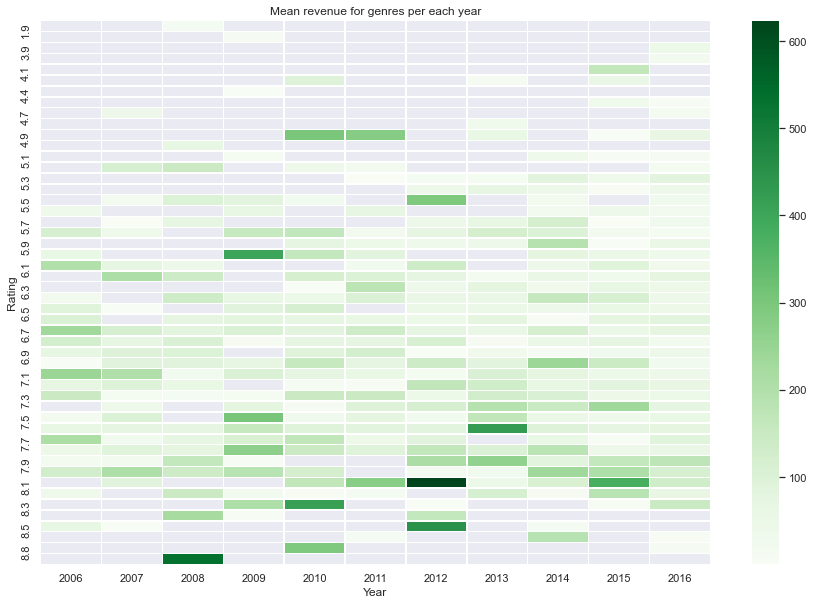

In [261]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(md_revenue_pivot, linewidths=.5, cmap='Greens').set_title("Mean revenue for genres per each year");

Here we can see heatmap diagram. The darker the cell color, the higher the average revenue value of film with particular rating and in particular year. Based on this analysis, we can notice, that in general movies with high ratings tend to have higher revenue. But not always so. For instance we can notice that some films in 2006,2007,2011, 2014, 2016 have the higher ratings, but revenue for this films less that 100 million dollars. Also we see, that movies in 2010 and 2011 with low raitings as 4.9, in 2009 with raiting with 5.9 or in 2012 with raiting 5.5 have higher revenue such as 350 millions and more.

#### Question 2: Find which year had the most highly-rated films.

Firstly, let's take a look at diagram below.

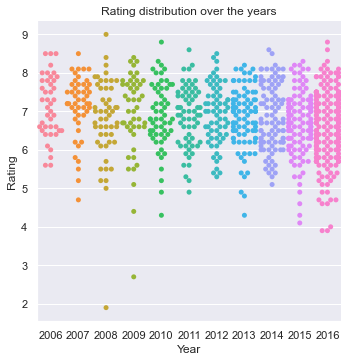

In [213]:
sns.set(rc={'figure.figsize':(30,10)})
sns.catplot(data=data, kind="swarm",
            x="Year", 
            y="Rating");
plt.title('Rating distribution over the years');

With this graphic we can see, that the relationship between year and rating of film is quate stable. And from year to year approximately the same ratio of films by rating. Also you can notice, that over the years people have started to vote more(because we see more circles).

Then I want to see average rating per year.

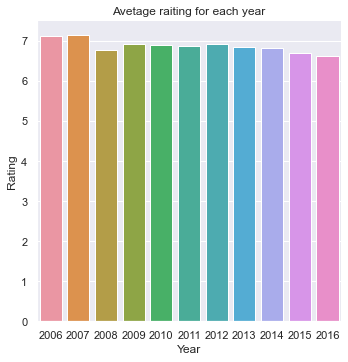

In [156]:
sns.set(rc={'figure.figsize':(26.7,8.27)})
sns.catplot(data=data, kind="bar", 
            x="Year", y="Rating", ci=None);
plt.title('Avetage raiting for each year');

This bar chart confirms what we found out earlier. The average rating of a film is generally the same every year. Although, it is easy to notice, that 2007 was the year with the highest average rating and 2008 with the lowest. Also we can see, that after a small leap in data in 2009, average ratings of films are decrease year after year.

#### Question 3: Identify which director makes films with the biggest revenue.

In [251]:
data_q3 = data.copy(deep=True)

In [252]:
data_q3.drop(data_q3.columns.difference(['Revenue', 'Title','Director','Year']), 1, inplace=True)

First of all, I have done already familiar for us steps. 

In [253]:
data_q3.describe() 
#identify mean of revenue

,Year,Revenue
count,872.000000,872.000000
mean,2012.478211,82.956376
std,3.183552,103.253540
min,2006.000000,0.000000
25%,2010.000000,13.270000
50%,2013.000000,47.985000
75%,2015.000000,113.715000
max,2016.000000,936.630000


Then I am planning to create new dataframe that would be contain only films with large revenue (75% according to describe info)

In [262]:
biggest_revenue = data_q3[(data_q3['Revenue'] >= 113.715000)]

In [263]:
biggest_revenue.info() #have 218 films with biggest revenue

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 946
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     218 non-null    object 
 1   Director  218 non-null    object 
 2   Year      218 non-null    int64  
 3   Revenue   218 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.5+ KB


Now I have cleaned and prepared dataset with 218 unique values for films with highest revenue. Next my step is count films of each director and leave only that Directors who has produced minimum 2 movies.

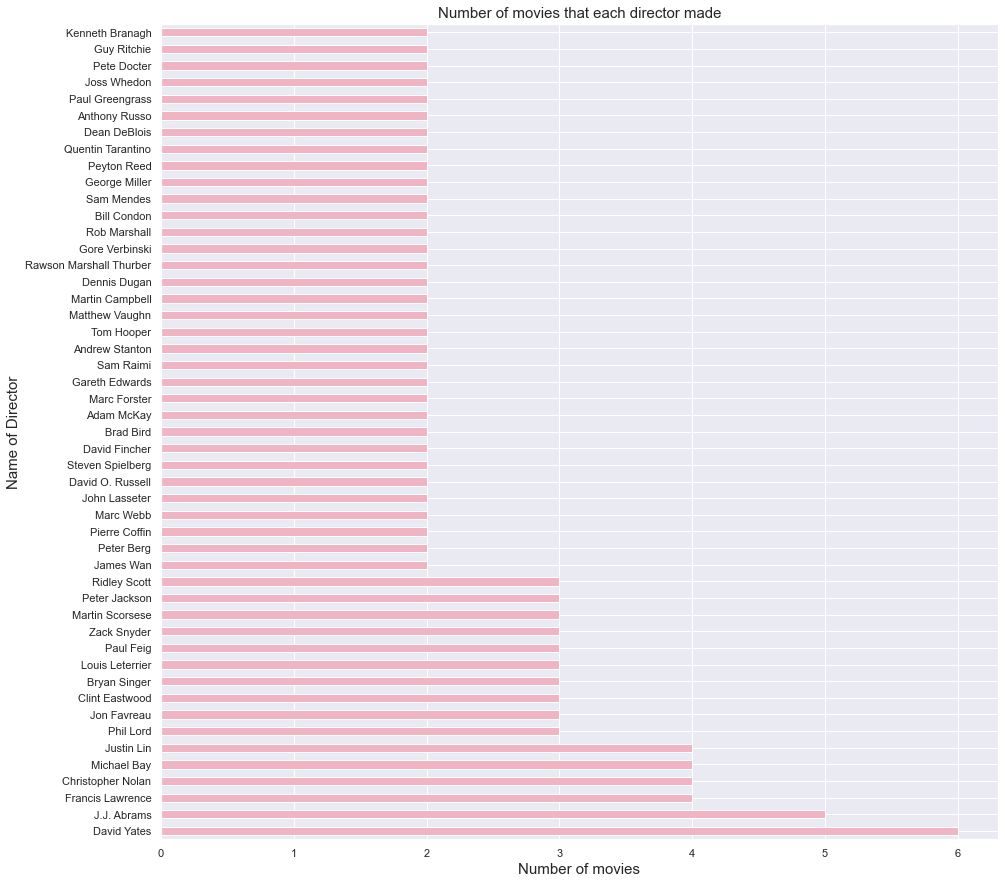

In [256]:
biggest_revenue_director = biggest_revenue['Director'].value_counts()
plt.figure(figsize=(15,15));
biggest_revenue_director = biggest_revenue_director[(biggest_revenue_director >= 2)].plot(kind='barh', color='#F0B4C3');
plt.title("Number of movies that each director made", size=15)
plt.xlabel("Number of movies", size=15);
plt.ylabel("Name of Director", size=15);

With this diagram it is easy to see, that David Yates made exactly 6 films with biggest revenue and he has the leading position in this figure. Next after David Yates is J.J. Abrams with 5 films. Then we have 4 directors with 4 films and 10 directors with 3 films. The rest of Directors made only 2 movies.

#### Question 4: Track relationship between genres and rating of film. Which genre are most often ranked low and which are the highest? 

First of all, create dataframe with the columns, that are needed. Also in Genre column there are several genres, so I will separete them with a comma.

In [24]:
data_q4 = data.copy(deep=True)

In [25]:
data_q4.drop(data_q4.columns.difference(['Rating', 'Title','Genre','Year']), 1, inplace=True)
data_q4.Genre = data_q4.Genre.str.split(',')

There are function that I took from internet. This function make a list of genres and split it to separate rows.
Source: https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows

In [26]:
   def explode(data, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = data.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = data[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(data[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(data[col].values) for col in lst_cols}) \
          .loc[:, data.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(data[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(data[col].values) for col in lst_cols}) \
          .append(data.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, data.columns]

In [27]:
data_q4.dropna(inplace = True);
data_q4 = explode(data_q4, ['Genre']);

After finishing some data preparation, let's identify the most popular genre in this dataset.

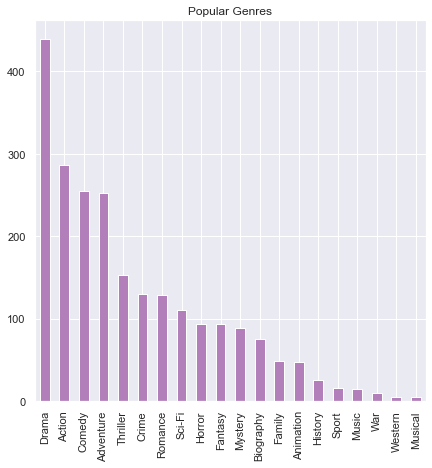

In [190]:
popular_genres = data_q4['Genre'].value_counts()
popular_genres.plot(kind='bar', figsize=(7,7), sort_columns='True', title='Popular Genres', color='#B37FBB');

It is obvious, that the most popular genre is drama. More than 400 movies from this dataset have drama genre. Then I want to know which genre is highly-rated.

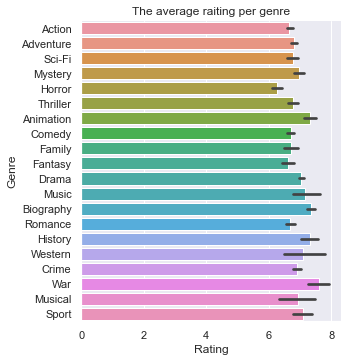

In [179]:
sns.catplot(data=data_q4, kind="bar",
            x="Rating", y = "Genre");
plt.title('The average raiting per genre');

Unexpectedly for me, films with the war genre receive the highes ratings. The less-rated genre is horror according to this bar chart. Then let's see the distribution of genres by years.

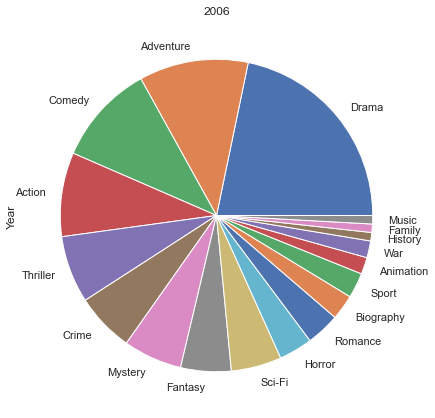

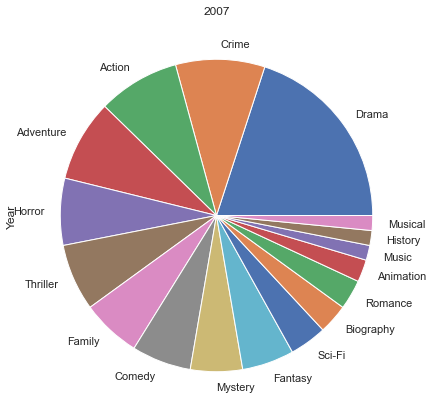

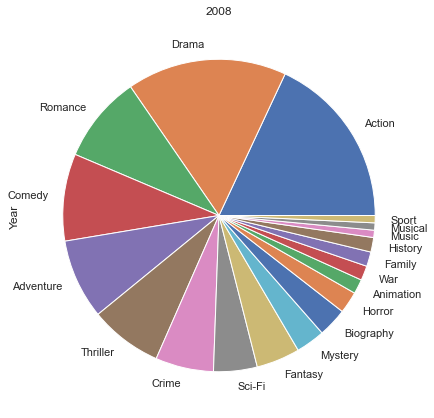

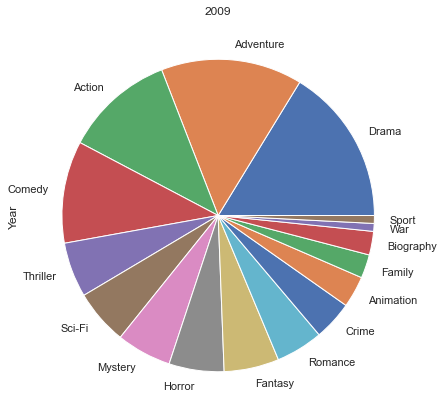

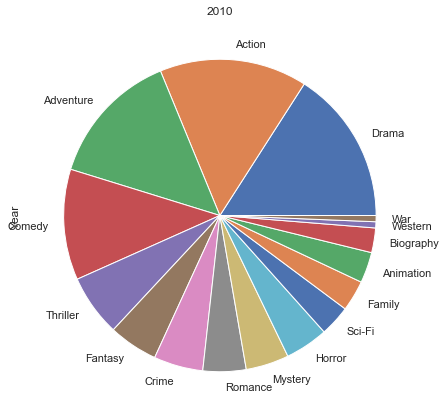

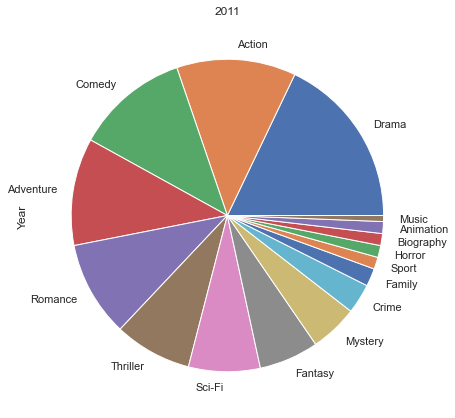

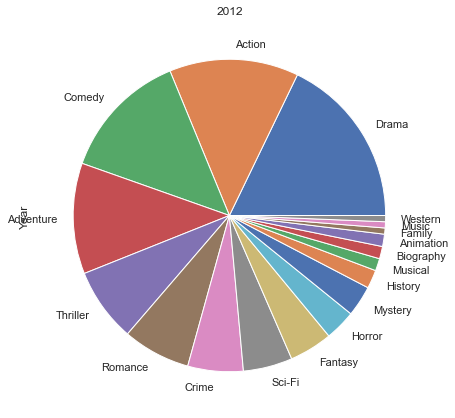

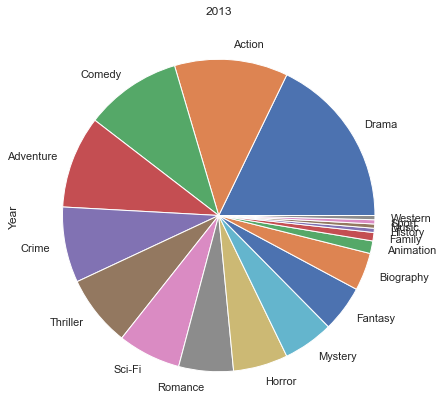

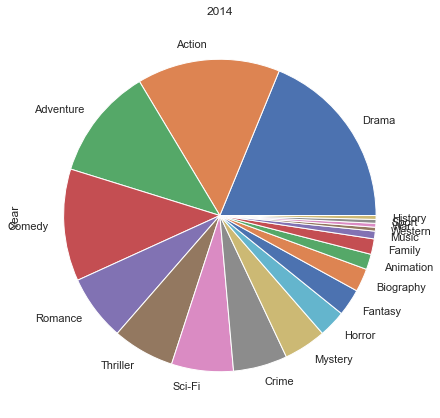

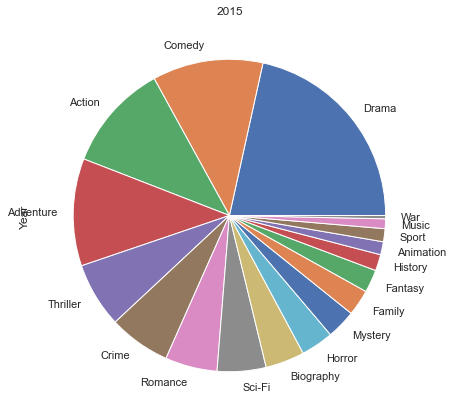

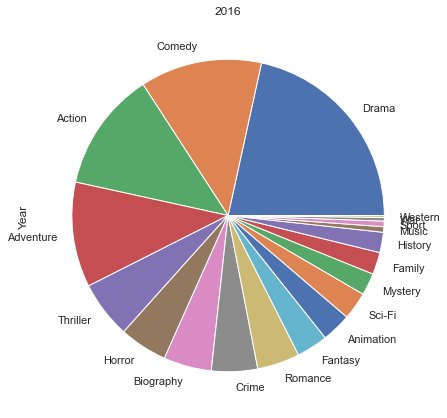

In [182]:
years = data_q4['Year'].unique()
years.sort()

for i in years:
    genre_popularity = data_q4[data_q4['Year'] == i]
    genre_popularity = (genre_popularity.groupby('Genre')['Year'].sum()).sort_values(ascending=False)
    genre_popularity.plot(kind='pie', figsize=(7,9));
    plt.title(i)
    plt.show()

In this pie chart we can see, that drama is leading genre every year execept of 2008, where leading genre is action. Also popular genres are Action, Comedy and Adventure. They have been changed, but always 
have 1-4 place every year.

After looking at genre distribution, I am going to find mean value for rating.

In [31]:
md_year_genre_rating = pd.DataFrame(data_q4.groupby(['Year','Genre'])['Rating'].mean())
md_year_genre_rating.head()

Rating
Year Genre              
2006 Action     6.870000
     Adventure  7.069231
     Animation  6.800000
     Biography  7.233333
     Comedy     6.825000

In [32]:
md_rating_pivot = pd.pivot_table(md_year_genre_rating, values='Rating', index=['Genre'], columns=['Year'])
md_rating_pivot.head()

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Genre,,,,,,,,,,,
Action,6.870000,6.772727,6.820833,6.614286,6.829167,6.750000,6.709524,6.766667,6.735135,6.681818,6.355385
Adventure,7.069231,7.063636,6.736364,6.911111,6.940909,6.583333,6.877778,6.804545,6.941379,6.839394,6.575439
Animation,6.800000,7.100000,8.000000,7.725000,7.840000,6.550000,7.500000,7.400000,7.700000,7.000000,7.100000
Biography,7.233333,7.725000,7.300000,7.133333,7.775000,8.100000,7.550000,7.766667,7.483333,7.208333,7.096154
Comedy,6.825000,7.200000,6.091667,6.961538,6.805556,6.752632,6.752381,6.839130,6.637931,6.755882,6.568182


I created a table for mean value of rating for each genre for ten years.

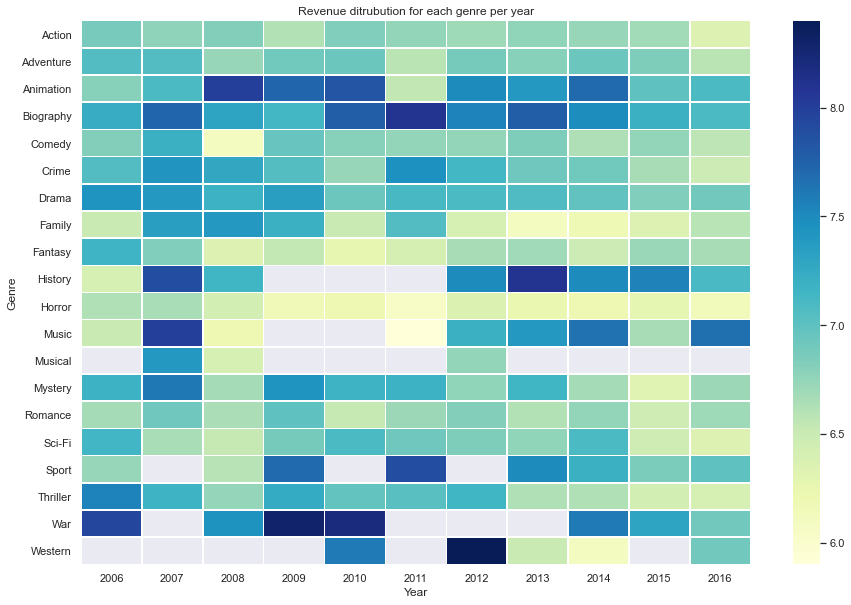

In [183]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(md_rating_pivot, linewidths=.5, cmap='YlGnBu');
plt.title('Revenue ditrubution for each genre per year');


In the graph above, we can find the average rating for each genre from 2006 to 2016. The darkest color represents the higher ratings. We can notice, that genre western is not so popular, but not in 2012. Also we see, that after popularity of war in 2009 and 2010 for next 3 years this genre was not popular at all. The less popular genre according to this heatmap is musical. The animation and biograply genre usually got more that 7.0 rating. As we found out earlier horror genre always has not higher than 7.0 raiting, ususally 6.0-6.5.

#### Question 5: Which actors are often found in high-rated films?


In [216]:
data_q5 = data.copy(deep=True)

In [217]:
data_q5.drop(data_q5.columns.difference(['Actors', 'Title','Rating','Year']), 1, inplace=True)

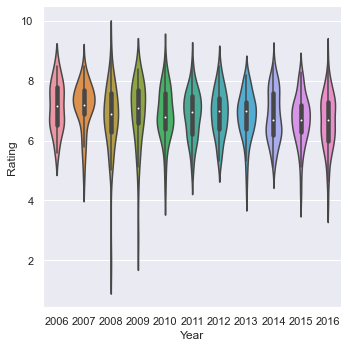

In [218]:
sns.color_palette("Set2")
sns.catplot(data=data_q5, kind="violin",
            x="Year", 
            y="Rating");

At this violin diagram we identify the average raiting. So I decided, that every movie, which has raiting more than 8 would be 'high_rated'.

In [270]:
high_rated = data_q5[(data_q5['Rating'] > 8)]

In [271]:
high_rated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 991
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   55 non-null     object 
 1   Actors  55 non-null     object 
 2   Year    55 non-null     int64  
 3   Rating  55 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.1+ KB


Then I am planning to split Actors column.

In [272]:
high_rated.Actors = high_rated.Actors.str.split(',')

In [273]:
high_rated.dropna(inplace = True);
high_rated = explode(high_rated, ['Actors']);

In [274]:
high_rated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   220 non-null    object 
 1   Actors  220 non-null    object 
 2   Year    220 non-null    int64  
 3   Rating  220 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.0+ KB


After that I will count number of movies for each actors, and leave only that actors, who played in 2 and more films.

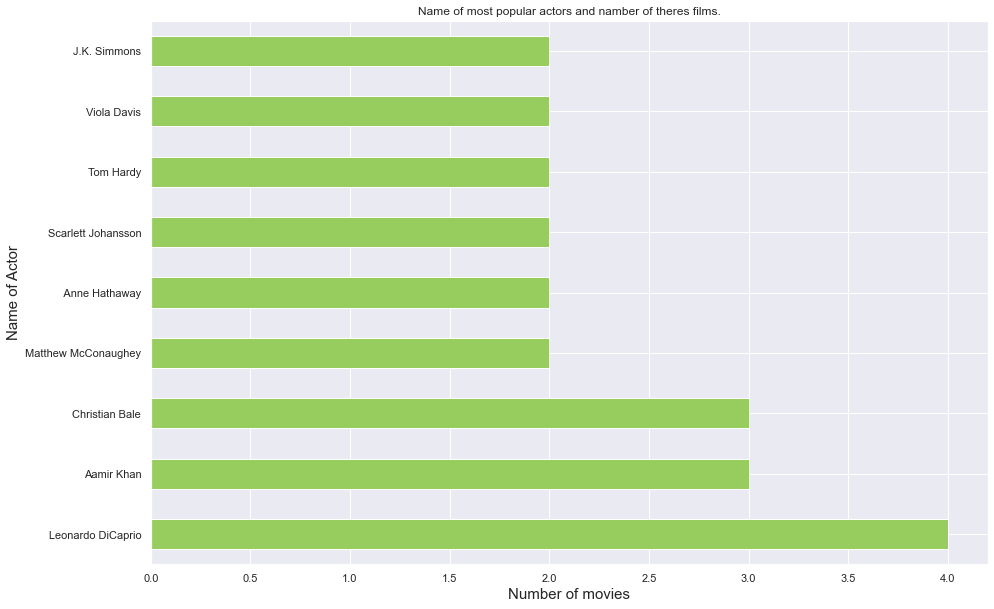

In [275]:
popular_actors = high_rated['Actors'].value_counts()
plt.figure(figsize=(15,10));
popular_actors = popular_actors[(popular_actors >= 2)].plot(kind='barh', color='#97CD5F')
plt.title('Name of most popular actors and namber of theres films.');
plt.xlabel("Number of movies", size=15);
plt.ylabel("Name of Actor", size=15);


The most popular actor is Leonardo DiCaprio. He played in 4 high-rated movies. The second place is shared by the actors Christian Bale and Aamir Khan. Both played in 3 high-rated films. And we see the 6 actors with 2 movies.

#### Question 6: Is there any relationship between films with the most popular actors and the income of the movie?

In [237]:
data_q6 = data.copy(deep=True)

In [238]:
data_q6.drop(data_q6.columns.difference(['Actors', 'Title','Revenue','Year']), 1, inplace=True)

In [239]:
data_q6.Actors = data_q6.Actors.str.split(',')

In [240]:
data_q6.dropna(inplace = True);
data_q6 = explode(data_q6, ['Actors']);

First of all, I prepared dataframe for this question.

In [241]:
data_q6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Title    3487 non-null   object 
 1   Actors   3487 non-null   object 
 2   Year     3487 non-null   int64  
 3   Revenue  3487 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 109.1+ KB


In previous question I identified name of actors, who played in high-rated movie. So now I leave only that films, where this actors played.

In [242]:
popular_actors_new = data_q6[(data_q6['Actors'] == 'J.K. Simmons') | 
                             (data_q6['Actors'] == 'Viola Davis') | 
                             (data_q6['Actors'] == 'Tom Hardy') |
                             (data_q6['Actors'] == 'Scarlett Johansson') | 
                             (data_q6['Actors'] == 'Anne Hathaway') | 
                             (data_q6['Actors'] == 'Matthew McConaughey') | 
                             (data_q6['Actors'] == 'Christian Bale') | 
                             (data_q6['Actors'] == 'Aamir Khan') |
                             (data_q6['Actors'] == 'Leonardo DiCaprio')]

In [243]:
popular_actors_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 12 to 3259
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Title    47 non-null     object 
 1   Actors   47 non-null     object 
 2   Year     47 non-null     int64  
 3   Revenue  47 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ KB


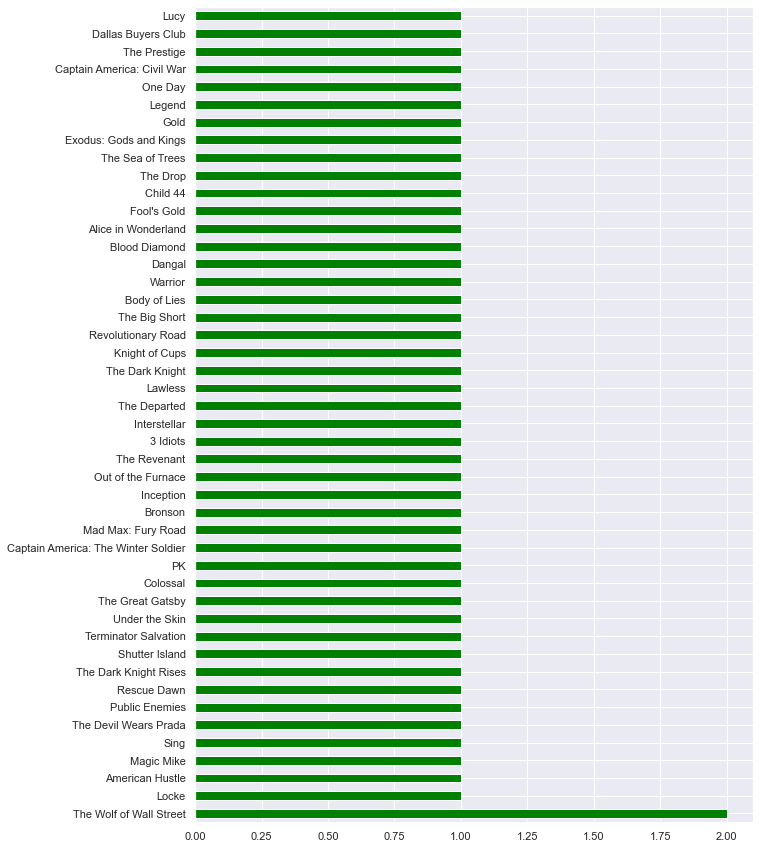

In [244]:
plt.figure(figsize=(10,15));
popular_actors_movies = popular_actors_new['Title'].value_counts().plot(kind='barh', color='green')

We see, that in film 'The Wolf of Wall Street' played two famous actors, so film was counted twice. I will delete duplicated row.

In [245]:
popular_actors_new = popular_actors_new.drop_duplicates(subset=['Title'], keep='first')

In [246]:
popular_actors_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 12 to 3259
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Title    46 non-null     object 
 1   Actors   46 non-null     object 
 2   Year     46 non-null     int64  
 3   Revenue  46 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ KB


In [257]:
biggest_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 946
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     218 non-null    object 
 1   Director  218 non-null    object 
 2   Year      218 non-null    int64  
 3   Revenue   218 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.5+ KB


Now I have two dataframes. The popular_actors_new contain 46 films where played most famous actors and second dataframe I took from question 3. biggest_revenue contain 218 films with highest revenue. Now I want to clearify relationship between them and find how many films are located in both dataframes. 

For this task I will use merge. Maximum value can be 46.

In [258]:
mergedStuff = pd.merge(biggest_revenue, popular_actors_new, on=['Title'], how='inner')

In [259]:
mergedStuff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      18 non-null     object 
 1   Director   18 non-null     object 
 2   Year_x     18 non-null     int64  
 3   Revenue_x  18 non-null     float64
 4   Actors     18 non-null     object 
 5   Year_y     18 non-null     int64  
 6   Revenue_y  18 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.1+ KB


Value is 18 out of 46. So we see, that it is not mandatory that famous actors played in films with big incomes.

In [250]:
mergedStuff.head(18)

,Title,Year_x,Revenue_x,Actors,Year_y,Revenue_y
0,Sing,2016,270.32,Matthew McConaughey,2016,270.32
1,Captain America: Civil War,2016,408.08,Scarlett Johansson,2016,408.08
2,Interstellar,2014,187.99,Matthew McConaughey,2014,187.99
3,The Dark Knight,2008,533.32,Christian Bale,2008,533.32
4,Mad Max: Fury Road,2015,153.63,Tom Hardy,2015,153.63
5,Inception,2010,292.57,Leonardo DiCaprio,2010,292.57
6,The Wolf of Wall Street,2013,116.87,Leonardo DiCaprio,2013,116.87
7,The Departed,2006,132.37,Leonardo DiCaprio,2006,132.37
8,The Dark Knight Rises,2012,448.13,Christian Bale,2012,448.13
9,The Revenant,2015,183.64,Leonardo DiCaprio,2015,183.64


Here we can see this 18 movies.

### Conclusion

In this project, I investigated top 1000 imdb movies from 2006 to 2016.
Based on analysis above, I received some insights. 
+ A movie's income is directly related to it's revenue.
+ Year after year people vote on imdb more and more. Also the average raiting is similar every year.
+ The David Yates is director, who has most of movies(6) with high revenue. 
+ The most popular genre is Drama, the less is War, Musical and Western. But War genre has more high-rated films and horror genre usually is less-rated.
+ Leonardo DiCaprio is most famous actor, who played in 4 high-rated movies.
+ Not always most popular actors played in movies with highest income.
